In [2]:
# Import the tools
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 

In [3]:
data = pd.read_csv("./abalone.csv")

In [4]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
data.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

In [6]:
#Checking the missing value
data.isna().sum()  

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

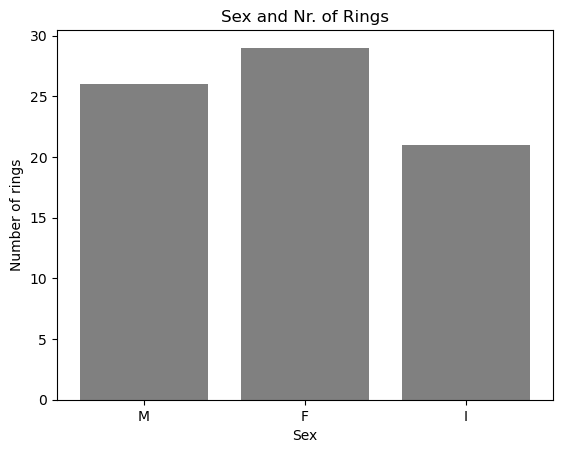

In [7]:
# Create the fig, ax
fig, ax = plt.subplots()

# Create bar plot of first 1000 data entries 
ax.bar(data["Sex"][:1000], data["Rings"][:1000], color="gray")

#Add legend: x is horizonatal axis, y is vertical
ax.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings");

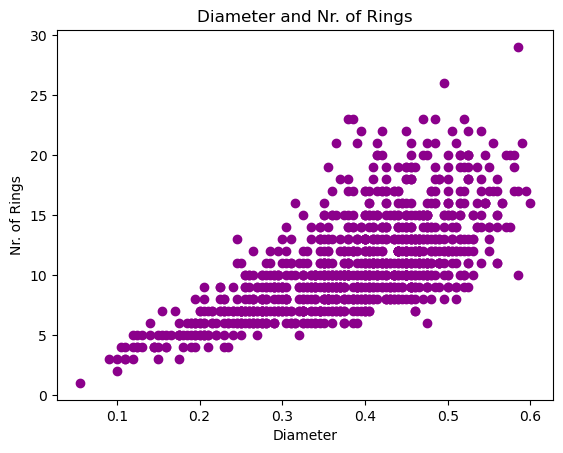

In [8]:
# Create a fig, ax
fig, ax = plt.subplots()

# Create a scatter plot with first 1000 data points
ax.scatter(data["Diameter"][:1000], data["Rings"][:1000], color="darkmagenta")

# Create a legend
ax.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings");

In [9]:
#creating numerical data, checking no missing values 
# will add an Age column are the some important works before Data modeelling

In [10]:
#  categorical data to numerical is by using label encoding
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
l_encoder = LabelEncoder()

# transform data
data["Sex"] =  l_encoder.fit_transform(data["Sex"])

In [11]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
# to determine the age of the abalone molluscs based on the number of rings. We know that age is determined by the number of rings + 1.5.
# Add age column
data["Age"] = data["Rings"] + 1.5

# Drop rings column
data.drop("Rings", axis=1, inplace=True)

In [13]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [14]:
#Model

# Split data into X and y
#Split data into x (features) and y (target)
X = data.drop("Age", axis=1) #axis=1 means that we drop the entire column
y = data["Age"]

In [36]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [16]:
y[:20]

0     16.5
1      8.5
2     10.5
3     11.5
4      8.5
5      9.5
6     21.5
7     17.5
8     10.5
9     20.5
10    15.5
11    11.5
12    12.5
13    11.5
14    11.5
15    13.5
16     8.5
17    11.5
18     8.5
19    10.5
Name: Age, dtype: float64

In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #test_size=0.2 means that we use 20% of data for test set
                                                    random_state=14) #we choose a random number for random_state to make our results reproducable

In [18]:
len(X_train), len(y_train), len(X_test), len(y_test)

(3341, 3341, 836, 836)

In [19]:
# import model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14,)

# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [20]:
# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function
def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [21]:
# fit the model again
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [22]:
rf.score(X_test,y_test)*100

52.53587245211205

In [23]:
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

Text(0.5, 1.0, 'Predictions vs labels')

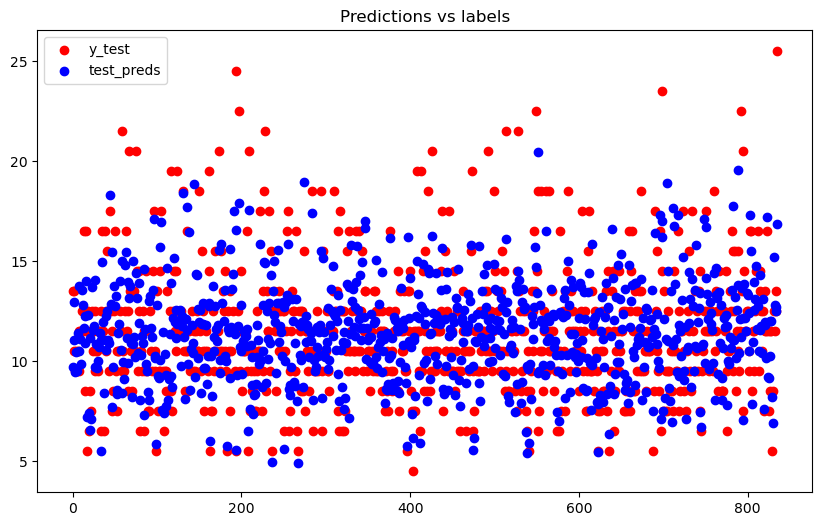

In [24]:
# Predict the labels on test data
test_preds = rf.predict(X_test) 

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="red", label="y_test")
plt.scatter(range(y_test.shape[0]), test_preds, color="blue", label="test_preds")
plt.legend();
plt.title("Predictions vs labels")

In [38]:
rf.predict(X)

array([14.172,  8.584, 10.91 , ..., 11.012, 11.416, 13.15 ])

In [40]:
rf.predict(X_test)

array([ 9.872, 13.146, 11.022,  9.248, 10.408,  9.5  , 11.504, 10.424,
       13.156, 11.152,  9.876, 13.41 , 12.624, 11.496, 12.406, 11.234,
       14.208,  7.164, 12.5  ,  7.3  , 11.09 ,  6.608,  7.03 , 13.79 ,
       11.568, 11.732,  9.662, 13.982, 11.004,  9.452,  9.98 , 10.3  ,
       11.574, 11.256,  5.458, 15.228, 12.086,  8.448, 10.996, 10.264,
       12.388, 12.574, 11.1  , 10.876, 17.972, 12.514, 15.032,  7.762,
        9.74 , 13.844, 12.484, 13.092,  8.448,  8.416, 11.37 , 11.878,
       13.774, 10.634, 14.852,  8.396,  9.958,  9.204, 14.648, 15.4  ,
       11.096, 14.084,  9.83 , 13.094, 13.684, 10.886,  8.102, 14.904,
       10.82 , 11.118, 10.234, 14.486, 13.202, 10.376, 12.038, 13.61 ,
        8.3  , 10.29 , 10.724, 10.92 , 14.588,  7.478, 11.678, 10.028,
        9.566,  8.442, 13.318,  8.01 , 12.952, 11.714, 11.042, 13.894,
       17.35 , 10.324, 10.272,  5.942, 12.726,  9.506,  9.212, 10.144,
       15.436, 16.49 ,  7.422, 11.436,  7.428, 10.374,  9.398,  7.812,
      

In [41]:
rf.predict([[ 9.872, 13.146, 11.022,  9.248, 10.408,  9.5  , 11.504, 10.424,]])

c:\Users\Sachin Mishra\appl\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([18.942])

In [54]:
# import model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14,n_estimators=500, max_features=9)

# fit the model
rf.fit(X_train, y_train)
rf.score(X_test,y_test)*100

53.89351449309581

In [32]:
#Implementing SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [42]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
#Define and train the SVR model
svr = SVR(kernel='rbf')  # Radial basis function kernel
svr.fit(X_scaled, y)

SVR()

In [45]:
X_test_scaled = scaler.transform(X_test)
predictions = svr.predict(X_test_scaled)

In [48]:
svr.score(X_test,y_test)*100

c:\Users\Sachin Mishra\appl\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


5.75144528019127

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
reg = LinearRegression()

In [51]:
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
predictions = reg.predict(X_test)

In [53]:
reg.score(X_test,y_test)*100

46.61056420157483